# Looking at possible ftr paths created from 2 sets of nodes, we want to see what the payoffs look like for each path. 


In [1]:
from pandas import DataFrame, read_csv

import matplotlib.pyplot as plt
import pandas as pd #this is how I usually import pandas
import sys #only needed to determine Python version number
import matplotlib #only needed to determine Matplotlib version number
import itertools
import numpy as np

# Enable inline plotting
%matplotlib inline

In [2]:
node_list_a = ["OTA", "BEN", "HAY", "ISL", "INV", "MDN", "STK", "WKM", "KMO"]
node_list_b = ["OTA", "BEN", "HAY", "ISL", "INV", "MDN", "STK", "WKM", "OHA"]
node_list_c = ["OTA", "BEN", "HAY", "ISL", "INV", "MDN", "STK", "WKM", "SFD"]
a_paths = itertools.permutations(node_list_a, 2)
b_paths = itertools.permutations(node_list_b, 2)
c_paths = itertools.permutations(node_list_c, 2)
a_ftr_path_list = [path_tuple[0] + '_' + path_tuple[1] for path_tuple in a_paths]
b_ftr_path_list = [path_tuple[0] + '_' + path_tuple[1] for path_tuple in b_paths]
c_ftr_path_list = [path_tuple[0] + '_' + path_tuple[1] for path_tuple in c_paths]

In [3]:
monthly_payoffs = pd.read_csv('billy_fixed_monthly_payoffs.csv', index_col=0)

In [4]:
a_monthly_payoffs = monthly_payoffs[a_ftr_path_list]
b_monthly_payoffs = monthly_payoffs[b_ftr_path_list]
c_monthly_payoffs = monthly_payoffs[c_ftr_path_list]
a_monthly_payoffs.index = pd.to_datetime(a_monthly_payoffs.index)
b_monthly_payoffs.index = pd.to_datetime(b_monthly_payoffs.index)
c_monthly_payoffs.index = pd.to_datetime(c_monthly_payoffs.index)

In [5]:
a_info = a_monthly_payoffs.describe()
a_info.loc[:, a_info.loc['mean'] < .05]

/Users/billyfung/anaconda3/lib/python3.5/site-packages/numpy/lib/function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


,ISL_BEN,MDN_OTA,MDN_WKM,MDN_KMO,STK_BEN,STK_ISL
count,205.000000,201.0,201.000000,95.000000,205.000000,205.000000
mean,0.000366,0.0,0.034284,0.015706,0.003196,0.003136
std,0.004310,0.0,0.129890,0.041583,0.033297,0.034252
min,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
25%,0.000000,NaN,NaN,NaN,0.000000,0.000000
50%,0.000000,NaN,NaN,NaN,0.000000,0.000000
75%,0.000000,NaN,NaN,NaN,0.000000,0.000000
max,0.060687,0.0,1.456312,0.233049,0.466216,0.479758


In [6]:
b_info = b_monthly_payoffs.describe()
b_info.loc[:, b_info.loc['mean'] < 2]

/Users/billyfung/anaconda3/lib/python3.5/site-packages/numpy/lib/function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


,OTA_MDN,OTA_WKM,BEN_OHA,HAY_WKM,ISL_BEN,ISL_INV,ISL_OHA,INV_BEN,INV_OHA,MDN_OTA,MDN_HAY,MDN_WKM,STK_BEN,STK_ISL,STK_INV,STK_OHA,OHA_BEN
count,201.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,201.0,201.000000,201.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,1.974159,0.116161,0.261448,1.578661,0.000366,0.937722,0.001418,0.713982,0.682541,0.0,1.473661,0.034284,0.003196,0.003136,0.504966,0.003834,0.070642
std,1.171301,0.305916,0.486571,2.588691,0.004310,2.136303,0.018015,0.910920,0.866280,0.0,4.243133,0.129890,0.033297,0.034252,1.263541,0.034870,0.072764
min,0.490610,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,NaN,0.000000,0.021333,0.114052,0.000000,0.001340,0.000000,0.053354,0.044115,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.012043
50%,NaN,0.000060,0.094590,0.699435,0.000000,0.096972,0.000000,0.371384,0.353723,NaN,NaN,NaN,0.000000,0.000000,0.019913,0.000000,0.055309
75%,NaN,0.076389,0.291431,2.031986,0.000000,0.823854,0.000000,1.084340,1.045470,NaN,NaN,NaN,0.000000,0.000000,0.383978,0.000000,0.100470
max,7.890430,2.052549,3.833359,20.349612,0.060687,15.721722,0.255861,5.358044,5.275188,0.0,33.407104,1.456312,0.466216,0.479758,8.262847,0.467440,0.355974


In [63]:
a_monthly_payoffs.to_csv('KMO_monthly_payoff.csv')
b_monthly_payoffs.to_csv('OHA_monthly_payoff.csv')
c_monthly_payoffs.to_csv('SFD_monthly_payoff.csv')

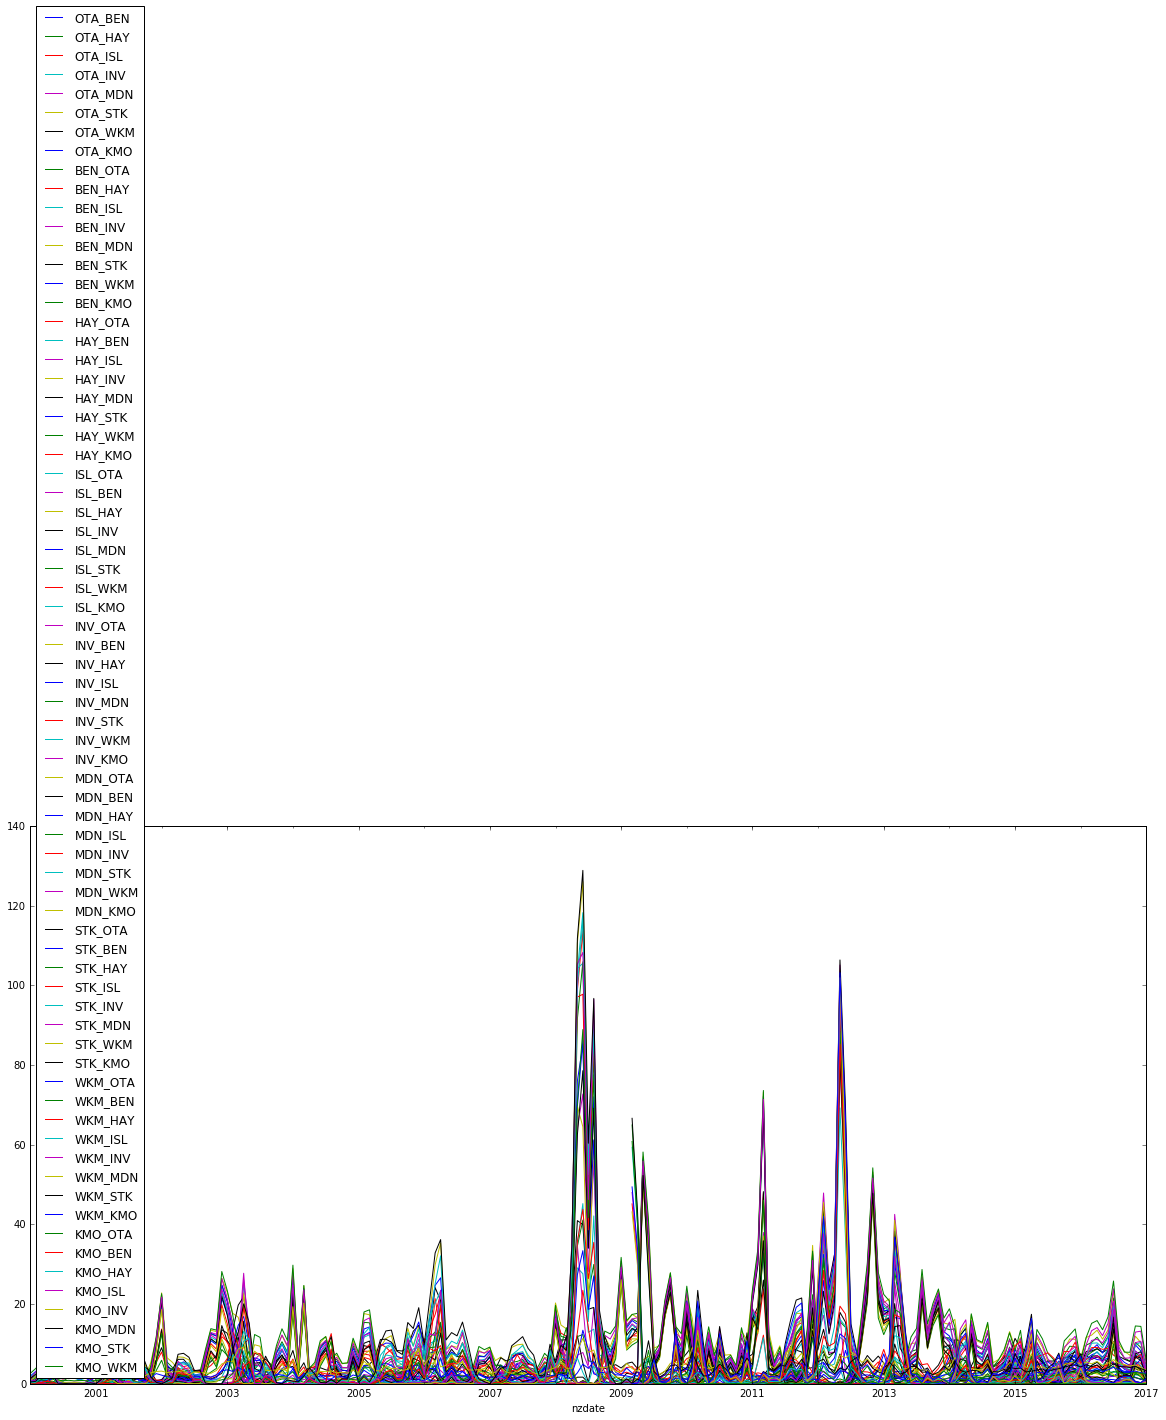

In [18]:
f = plt.figure(figsize=(20, 10))
a_monthly_payoffs.plot(ax=f.gca())
# combo4_weird.plot().legend(loc='center left', bbox_to_anchor=(1, 0.5));
f.savefig('KMO.png', dpi=100)

In [7]:
c_info = c_monthly_payoffs.describe()
c_info.loc[:, c_info.loc['mean'] < 2]

/Users/billyfung/anaconda3/lib/python3.5/site-packages/numpy/lib/function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


,OTA_MDN,OTA_WKM,OTA_SFD,HAY_WKM,HAY_SFD,ISL_BEN,ISL_INV,INV_BEN,MDN_OTA,MDN_HAY,MDN_WKM,MDN_SFD,STK_BEN,STK_ISL,STK_INV,WKM_SFD,SFD_WKM
count,201.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,201.0,201.000000,201.000000,201.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,1.974159,0.116161,0.361038,1.578661,0.655289,0.000366,0.937722,0.713982,0.0,1.473661,0.034284,0.163719,0.003196,0.003136,0.504966,0.903458,1.948626
std,1.171301,0.305916,1.049834,2.588691,0.882682,0.004310,2.136303,0.910920,0.0,4.243133,0.129890,0.690565,0.033297,0.034252,1.263541,2.055193,2.784526
min,0.490610,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.001573
25%,NaN,0.000000,0.003729,0.114052,0.019019,0.000000,0.001340,0.053354,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.056203,0.481606
50%,NaN,0.000060,0.052164,0.699435,0.347917,0.000000,0.096972,0.371384,NaN,NaN,NaN,NaN,0.000000,0.000000,0.019913,0.272160,1.087628
75%,NaN,0.076389,0.255289,2.031986,1.033837,0.000000,0.823854,1.084340,NaN,NaN,NaN,NaN,0.000000,0.000000,0.383978,0.787396,2.105704
max,7.890430,2.052549,9.726116,20.349612,6.484966,0.060687,15.721722,5.358044,0.0,33.407104,1.456312,7.935141,0.466216,0.479758,8.262847,16.959362,20.652668


In [68]:
c_monthly_payoffs['HAY_SFD']

nzdate
2000-01-31    0.315652
2000-02-29    0.267385
2000-03-31    0.167343
2000-04-30    0.379243
2000-05-31    0.369126
2000-06-30    0.790458
2000-07-31    0.406102
2000-08-31    1.041337
2000-09-30    1.427174
2000-10-31    3.625299
2000-11-30    3.318014
2000-12-31    1.284106
2001-01-31    2.085101
2001-02-28    0.420417
2001-03-31    0.045827
2001-04-30    0.024333
2001-05-31    0.030101
2001-06-30    0.000000
2001-07-31    0.000000
2001-08-31    0.006001
2001-09-30    0.000000
2001-10-31    0.000000
2001-11-30    0.074118
2001-12-31    1.038501
2002-01-31    1.888918
2002-02-28    0.347917
2002-03-31    0.012419
2002-04-30    0.000549
2002-05-31    0.000000
2002-06-30    0.003257
                ...   
2014-08-31    2.847359
2014-09-30    1.112267
2014-10-31    0.536210
2014-11-30    0.548389
2014-12-31    1.799160
2015-01-31    0.978616
2015-02-28    0.840372
2015-03-31    0.222077
2015-04-30    0.049007
2015-05-31    2.186136
2015-06-30    1.701285
2015-07-31    0.804718
2015

In [9]:
c_monthly_payoffs.head(10)

,OTA_BEN,OTA_HAY,OTA_ISL,OTA_INV,OTA_MDN,OTA_STK,OTA_WKM,OTA_SFD,BEN_OTA,BEN_HAY,...,WKM_STK,WKM_SFD,SFD_OTA,SFD_BEN,SFD_HAY,SFD_ISL,SFD_INV,SFD_MDN,SFD_STK,SFD_WKM
nzdate,,,,,,,,,,,,,,,,,,,,,
2000-01-31,0.062997,0.083817,0.218636,0.817386,NaN,0.336331,0.021848,0.038804,2.624180,1.157339,...,0.428656,0.056203,1.263474,0.057843,0.134812,0.322164,1.144879,NaN,0.585571,0.624805
2000-02-29,0.167227,0.141659,0.345941,0.780905,NaN,0.506947,0.031674,0.052550,3.857198,1.790690,...,0.630690,0.093534,2.040833,0.186724,0.280043,0.472493,1.001085,NaN,0.761128,1.338434
2000-03-31,1.131957,0.291399,1.820515,3.068579,NaN,2.123429,0.117105,0.014453,5.603357,3.779063,...,2.093365,0.005768,2.198446,1.323061,0.710746,2.218815,3.778454,NaN,2.748870,1.629294
2000-04-30,0.664451,0.715597,1.126250,2.454764,NaN,1.517444,0.248063,0.022424,4.692465,1.944861,...,1.471569,0.046458,3.973056,1.927493,2.206076,2.666632,4.202021,NaN,3.235014,3.278771
2000-05-31,0.374906,0.476929,1.965155,8.431888,1.302991,2.312366,0.131633,0.007628,7.666337,2.462823,...,2.361620,0.004738,7.761364,2.251304,3.263535,4.702493,10.824872,9.057285,5.600672,6.011532
2000-06-30,0.000111,0.000104,0.014993,0.000035,1.560743,0.057340,0.000153,0.000000,13.672986,3.197590,...,0.165368,0.000000,10.581368,0.295951,0.896090,0.877986,0.195722,12.142111,1.355917,7.589632
2000-07-31,0.000134,0.000383,0.016929,0.000255,1.129375,0.060087,0.000000,0.000000,8.743118,2.370444,...,0.122009,0.000000,6.477836,0.116371,0.511398,0.439241,0.109530,7.607211,0.792608,4.363414
2000-08-31,0.000000,0.000000,0.003602,0.001935,1.517648,0.015316,0.000000,0.000000,15.255282,3.731452,...,0.030995,0.000000,10.858878,0.061774,0.376384,0.327144,0.127366,12.376526,0.599819,7.833306
2000-09-30,0.000000,0.000000,0.000056,0.000576,1.520806,0.000590,0.000000,0.000000,16.714993,3.741951,...,0.003931,0.000563,11.862194,0.029604,0.316326,0.216451,0.253563,13.383000,0.394639,9.253903


In [20]:
south_island_nodes = ['BEN', 'ISL', 'INV', 'OHA', 'STK']
south_island_paths = itertools.permutations(south_island_nodes, 2)
south_island_paths_list = [path_tuple[0] + '_' + path_tuple[1] for path_tuple in south_island_paths]

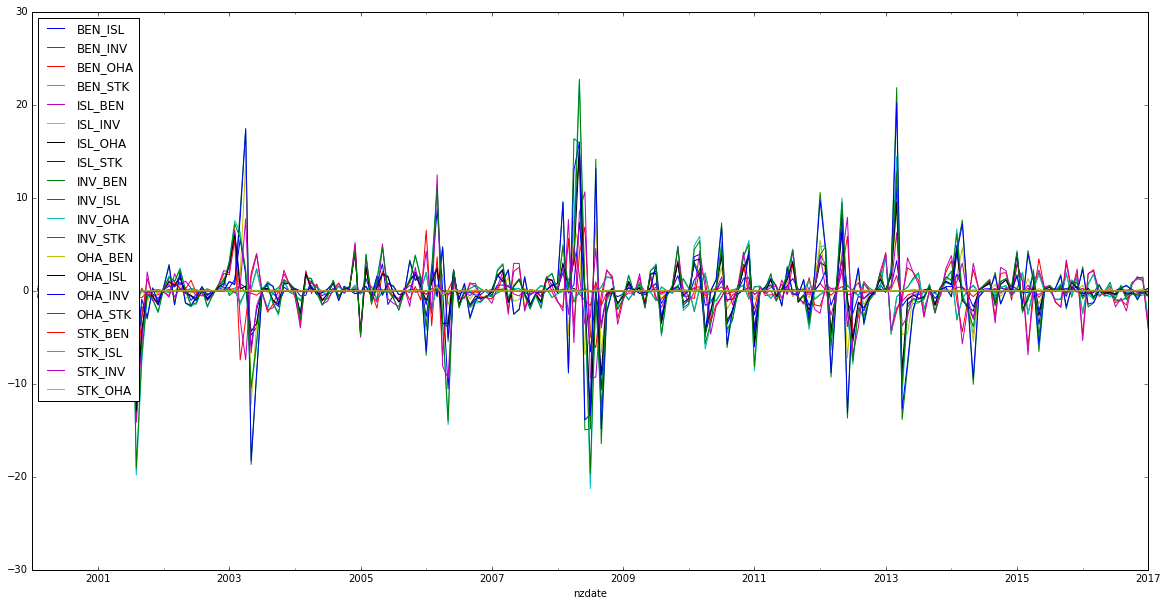

In [28]:

f = plt.figure(figsize=(20, 10))
b_monthly_payoffs.diff()[south_island_paths_list].plot(ax=f.gca())
# combo4_weird.plot().legend(loc='center left', bbox_to_anchor=(1, 0.5));


In [29]:
b_monthly_payoffs.diff()[south_island_paths_list].to_csv('OHA_south_paths_diff.csv')

In [30]:
OHA_south_diff = b_monthly_payoffs.diff()[south_island_paths_list]

In [34]:
OHA_south_diff[OHA_south_diff>0] = 1
OHA_south_diff[OHA_south_diff<0] = -1

In [52]:
OHA_south_diff.transpose().sort_values(by)

TypeError: sort_values() missing 1 required positional argument: 'by'

In [51]:
OHA_south_diff.transpose().columns

DatetimeIndex(['2000-01-31', '2000-02-29', '2000-03-31', '2000-04-30',
               '2000-05-31', '2000-06-30', '2000-07-31', '2000-08-31',
               '2000-09-30', '2000-10-31',
               ...
               '2016-04-30', '2016-05-31', '2016-06-30', '2016-07-31',
               '2016-08-31', '2016-09-30', '2016-10-31', '2016-11-30',
               '2016-12-31', '2017-01-31'],
              dtype='datetime64[ns]', name='nzdate', length=205, freq=None)